# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [3]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [4]:
data.shape

(10299, 562)

The data columns are all floats except for the activity label.


In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [6]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [7]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [8]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [9]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

1094    3
6599    4
2267    1
3390    5
1132    5
Name: Activity, dtype: int64

In [11]:
data.shape

(10299, 562)

In [12]:
data.columns.T

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [13]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [14]:
feature_cols.shape

(561,)

In [15]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


A histogram of the absolute value correlations.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

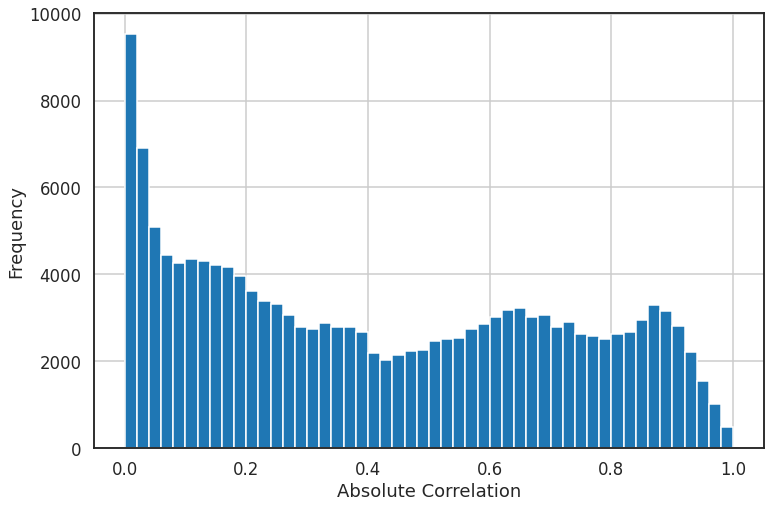

In [17]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [18]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [19]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [20]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [21]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [22]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [24]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [25]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
337  0.031304  0.375563  0.128008 -0.006907 -0.049620  0.577336  0.000000   
16   0.024852 -0.086043 -0.022885 -0.649445  0.216938 -0.230367  0.000000   
402  0.001113  0.262508  0.285182  0.306551  0.173995  0.075359 -0.007834   
114  0.037039 -1.189741  0.960328  0.277352  0.442693 -0.856212  0.000000   
466  0.001153  0.188106  0.269344  0.162086 -0.093505  0.262187  0.000000   
397 -0.025032  0.087876 -0.017881 -0.221682 -0.134034 -0.120811  0.000000   
492  0.002908  0.244178  0.268717  0.013330  0.082720  0.503164 -0.067060   
555  0.097655 -0.199579  0.147997  0.064433 -0.192798  0.006251  0.000000   
421 -0.016517  0.080845  0.063227 -0.273757  0.230458 -0.216544 -0.039555   
303 -0.016939  0.127423  0.125036  0.355479 -0.457117  0.313648  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
337  0.408509  0.000000  0.000000  0.000000  0.725454  0.032863  1.020358   
16   0.000000  0.000000 -0.211766  0.383072 -0.286388  0.031664 -0.221154   
402  0.584921  0.540602  0.029524  0.053389  0.084103 -0.019484  0.980437   
114 -2.991487  2.245504  0.000000  2.111774 -5.858277  0.120988 -1.977906   
466  0.150512  0.333505  0.000000  0.000000  0.348887 -0.018476  0.310757   
397  0.000000  0.000000  0.000000 -0.053838 -0.082640 -0.062243  0.320010   
492  0.711729  0.580159  0.000000  0.141940  0.365389 -0.016691  0.581338   
555 -0.363214  0.320496  0.155315 -0.467995 -0.193965  0.214536 -0.601989   
421  0.000000  0.000000  0.000000  0.237151 -0.140474 -0.045994  0.216228   
303  0.000000  0.000000  0.299742 -0.368500  0.298927 -0.045713  0.359076   

                                             
            2         3         4         5  
337  0.064708 -0.120302 -0.073722  1.143921  
16  -0.059568 -1.487246  0.212633 -0.487627  
402  0.373360  0.820578  0.365902 -0.124240  
114  1.211569  0.725633  0.855148 -1.649174  
466  0.359038  0.323462 -0.156239  0.405341  
397 -0.043492 -0.911650 -0.278558 -0.290936  
492  0.341067 -0.035043  0.176449  1.072837  
555  0.250396  0.144325 -0.391083 -0.189562  
421  0.059615 -0.800295  0.313369 -0.484701  
303  0.161539  1.206586 -1.037466  0.686503

In [26]:
lr.coef_.shape

(6, 561)

In [27]:
coefficients

lr                                                          l1  \
            0         1         2         3         4         5         0   
0   -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084  0.000000   
1    0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193  0.000000   
2    0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526  0.000000   
3    0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120  0.000000   
4   -0.045407 -0.034154 -0.451850  0.260243 -0.516844  0.106248  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.022132 -0.659468  0.550630 -0.234924  0.385179 -0.351492  0.000000   
557  0.058454 -0.246969  0.268995 -0.162010 -0.157603  0.174153  0.000000   
558  1.599105 -2.473094 -0.854612 -0.313142 -0.712694  0.416311  3.826424   
559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728  0.000000   
560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438815  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
0    0.000000  0.000000  0.000000  4.111194  0.000000 -0.135283 -1.348236   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.029334 -1.136432   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.040581 -1.421621   
3   -1.682975 -0.320049 -1.068994  0.000000  2.015888  0.019091 -2.562598   
4    0.000000 -1.574875  0.000000 -1.563126  0.000000 -0.035987  0.604554   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.765212  0.485515 -0.164683  0.473481 -0.681771 -0.142627 -0.820600   
557 -0.664945  0.865626 -0.078989 -0.021047  0.401964  0.119148 -0.676983   
558 -7.966099  0.000000  0.000000 -0.731404  0.220269  2.949029 -9.604522   
559  0.000000  0.000000  0.000000  0.000000  1.805830 -0.543058  2.940000   
560  0.000000  0.000000  0.000000  0.000000  2.000077 -0.230753  0.889229   

                                             
            2         3         4         5  
0    0.484293 -0.478943  1.838860  0.029754  
1    0.106709 -0.153941  0.185907 -0.524828  
2    0.462980  0.134551  0.007059 -0.954823  
3   -0.434866 -1.788830  0.275198  1.760470  
4   -0.665849  0.902850 -0.976813  0.072597  
..        ...       ...       ...       ...  
556  0.583775 -0.632115  0.632147 -0.624099  
557  0.456782 -0.486398 -0.143796  0.353108  
558 -0.924600 -0.832586 -1.465388  0.887849  
559  2.219459 -0.940630 -0.663063  2.024947  
560  0.569025  0.129735 -0.086929  1.021988  

[561 rows x 18 columns]

Prepare six separate plots for each of the multi-class coefficients.


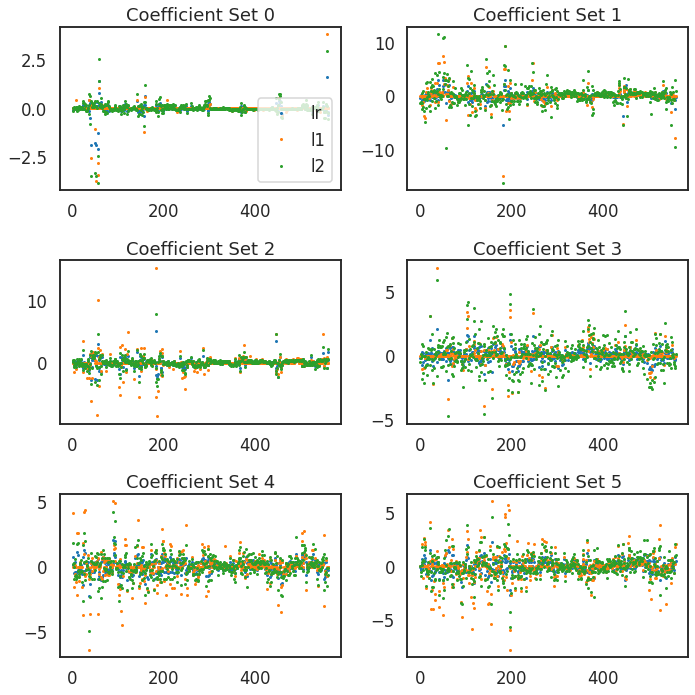

In [28]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [29]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [30]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998944,0.999757
1,0.988165,0.999407,0.999489
2,0.987592,0.995529,0.999657
3,0.981381,0.999185,0.994339
4,0.998277,0.999920,0.999997


## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [31]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [32]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990165


## Question 8

*   Display or plot the confusion matrix for each model.


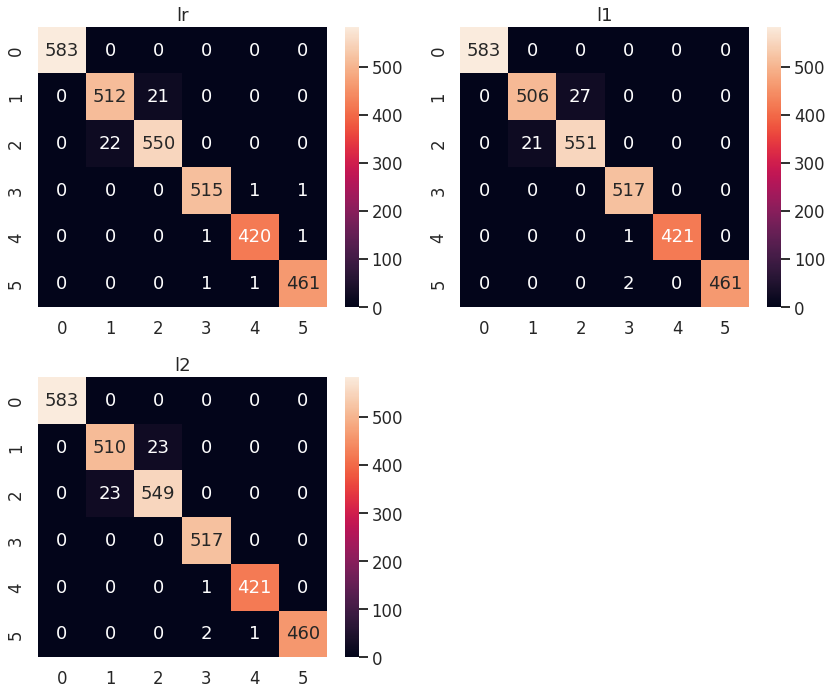

In [33]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
